In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Define the number of points to generate
num_points = 1200


In [3]:
# Generate the data based on equation y = mx + c
data = []
m = 0.2
c = 0.5
for i in range(num_points):
    # Generate 'x' 
    x = np.random.normal(0.0, 0.8)

    # Generate some noise
    noise = np.random.normal(0.0, 0.04)

    # Compute 'y' 
    y = m*x + c + noise 

    data.append([x, y])


In [4]:
# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]


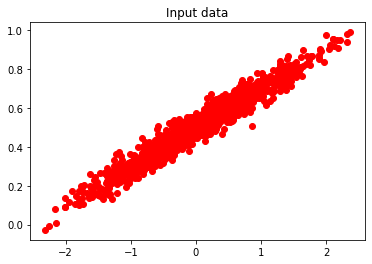

In [5]:
# Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()


In [6]:
# Generate weights and biases
# W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))


In [7]:
# Define equation for 'y'
y = W * x_data + b


In [8]:
# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [9]:
# Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


In [10]:
# Initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
# Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)


ITERATION 1
W = -0.14575946
b = 0.516846
loss = 0.08142532


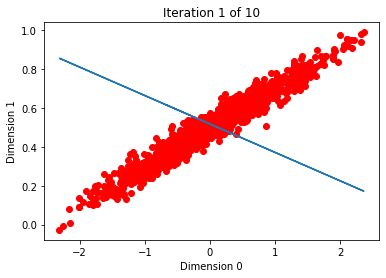


ITERATION 2
W = 0.08483404
b = 0.5045979
loss = 0.010378467


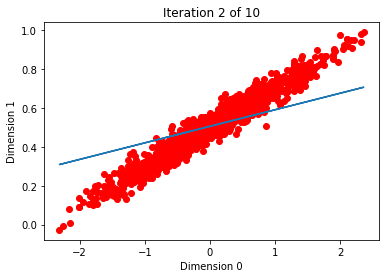


ITERATION 3
W = 0.16148648
b = 0.5006862
loss = 0.0025295622


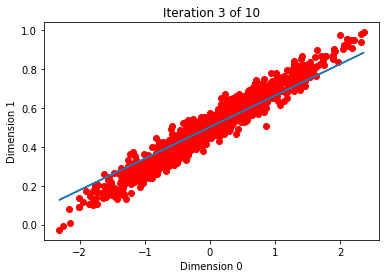


ITERATION 4
W = 0.1869641
b = 0.49938595
loss = 0.0016624511


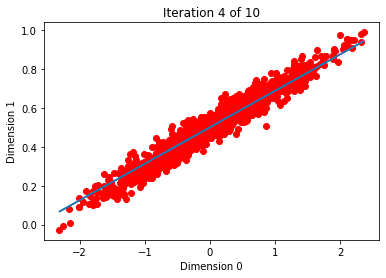


ITERATION 5
W = 0.19543229
b = 0.49895376
loss = 0.0015666569


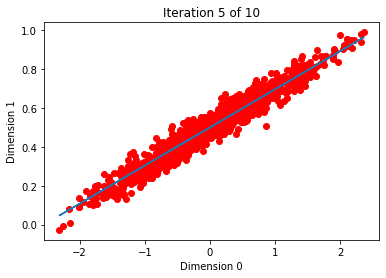


ITERATION 6
W = 0.19824694
b = 0.4988101
loss = 0.001556074


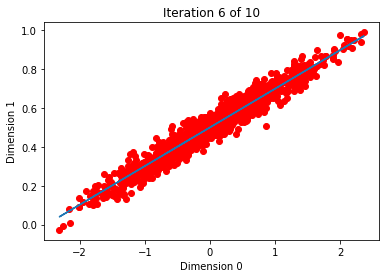


ITERATION 7
W = 0.19918247
b = 0.49876237
loss = 0.0015549047


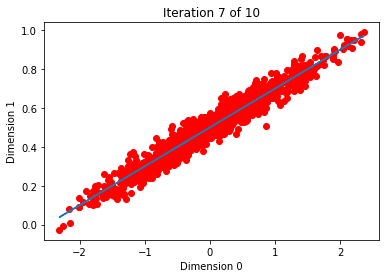


ITERATION 8
W = 0.19949342
b = 0.49874648
loss = 0.0015547756


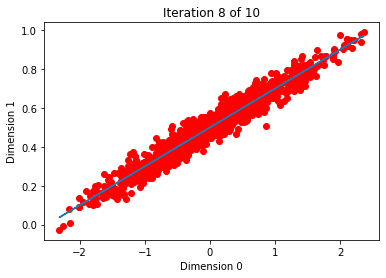


ITERATION 9
W = 0.19959678
b = 0.4987412
loss = 0.0015547615


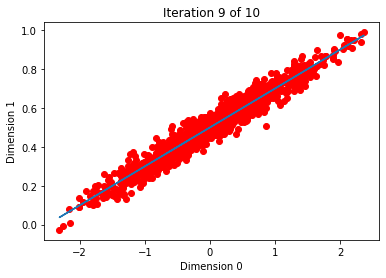


ITERATION 10
W = 0.19963112
b = 0.49873945
loss = 0.0015547599


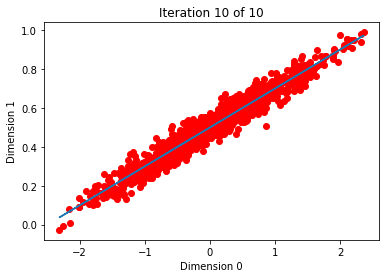

In [12]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
    # Run the session
    sess.run(train)

    # Print the progress
    print('\nITERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))

    # Plot the input data 
    plt.plot(x_data, y_data, 'ro')

    # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))

    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
    plt.show()